<h1>* Regression with an Abalone Dataset. </h1>
<p> Problem: This project we will use to analyze the data of Regression with an Abalone Dataset. </p>
<p> --> Abalones are a type of marine mollusk commonly used in scientific research and cullinary applications. </p>
<p> --> Ốc bươu là một loài động vật không xương sống dưới biển. </p>
<h1>* Các thuộc tính trong data cần nghiên cứu: </h1>
<p>+ id: số thứ tự</p>
<p>+ Sex: con ốc này thuộc giống đực hay là giống cái.</p>
<p>+ Diameter: là đường kính của con ốc bươu </p>
<p>+ Height: chiều cao của con ốc </p>
<p>+ Shell weight: độ dày của vỏ ốc </p>
<p>+ Rings (target variables): đây là biến mục tiêu --> dựa vào các dữ liệu trên để tiên đoán xem số vòng trên vỏ ốc bươu nhằm đoán xem tuổi của ốc </p>
<p> --> Phương pháp huấn luyện model: Linear Regression and PCA from scratch. </p>

Importing the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Import dataframe

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


Check the missing data from the dataframe

In [4]:
df_train.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

<Axes: ylabel='Rings'>

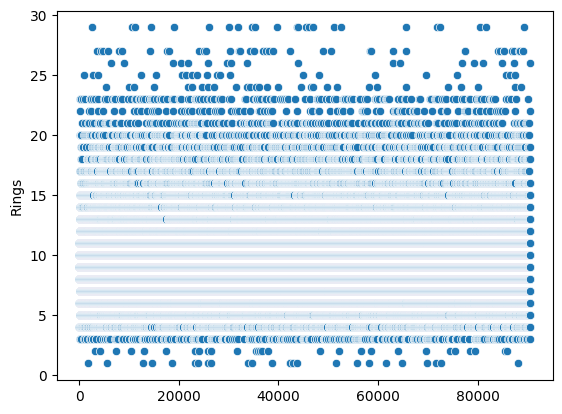

In [5]:
#draw a plot to describe the target variable
sns.scatterplot(df_train['Rings'])

This data needs to reduce the dimension of the data. Need to label encode the gender attributes.

In [6]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#label encoding
le = preprocessing.LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train.Sex)
df_test['Sex'] = le.fit_transform(df_test.Sex)
df_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


Data visualization

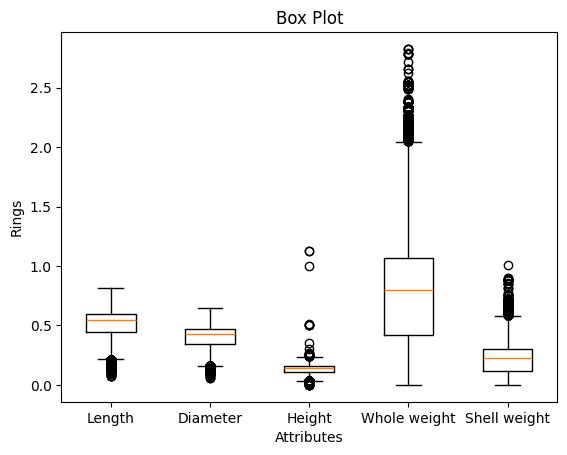

In [7]:
plt.boxplot([df_train['Length'], df_train['Diameter'], df_train['Height'], df_train['Whole weight'], df_train['Shell weight']])
plt.xticks([1, 2, 3, 4, 5], ['Length', 'Diameter', 'Height', 'Whole weight', 'Shell weight'])
plt.xlabel('Attributes')
plt.ylabel('Rings')
plt.title('Box Plot')
plt.show()


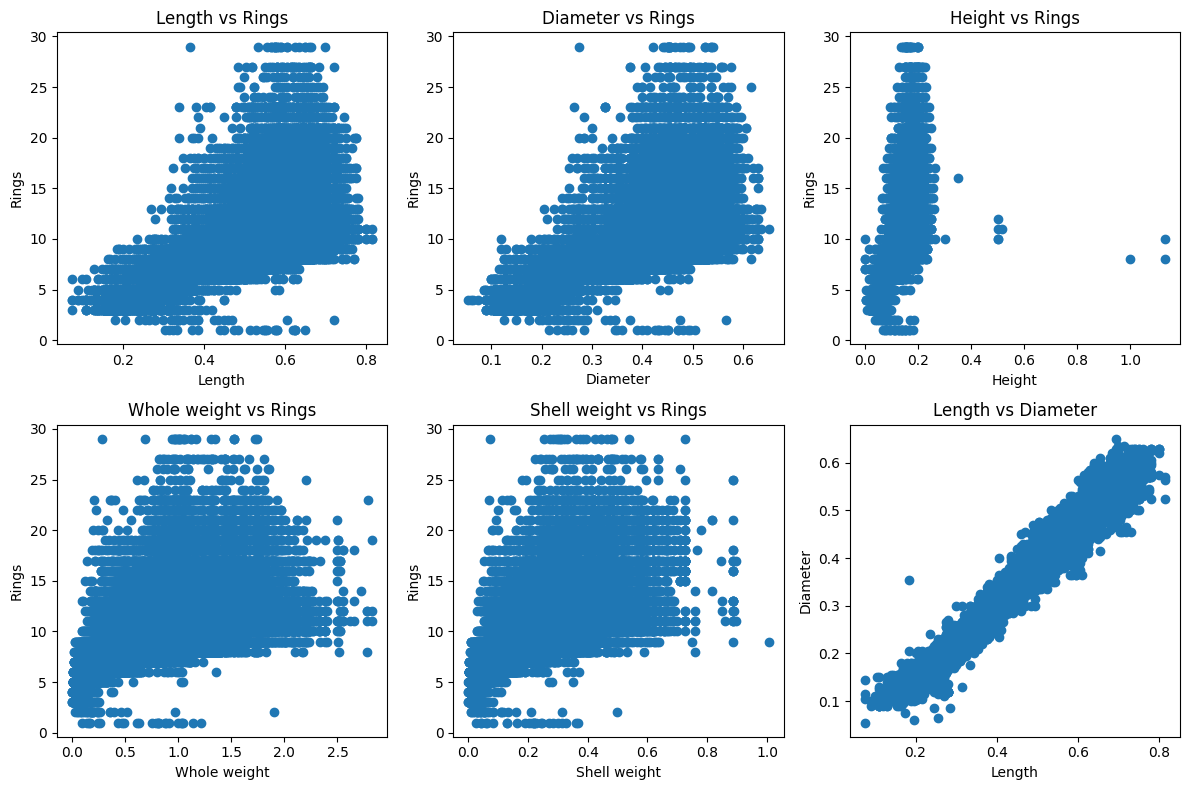

In [8]:
import matplotlib.pyplot as plt

# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
x1 = df_train['Length']
x2 = df_train['Diameter']
x3 = df_train['Height']
x4 = df_train['Whole weight']
x5 = df_train['Shell weight']
y = df_train['Rings']

# Scatter plot 1
axes[0, 0].scatter(x1, y)
axes[0, 0].set_xlabel('Length')
axes[0, 0].set_ylabel('Rings')
axes[0, 0].set_title('Length vs Rings')

# Scatter plot 2
axes[0, 1].scatter(x2, y)
axes[0, 1].set_xlabel('Diameter')
axes[0, 1].set_ylabel('Rings')
axes[0, 1].set_title('Diameter vs Rings')

# Scatter plot 3
axes[0, 2].scatter(x3, y)
axes[0, 2].set_xlabel('Height')
axes[0, 2].set_ylabel('Rings')
axes[0, 2].set_title('Height vs Rings')

# Scatter plot 4
axes[1, 0].scatter(x4, y)
axes[1, 0].set_xlabel('Whole weight')
axes[1, 0].set_ylabel('Rings')
axes[1, 0].set_title('Whole weight vs Rings')

# Scatter plot 5
axes[1, 1].scatter(x5, y)
axes[1, 1].set_xlabel('Shell weight')
axes[1, 1].set_ylabel('Rings')
axes[1, 1].set_title('Shell weight vs Rings')

# Scatter plot 6
axes[1, 2].scatter(df_train['Length'], df_train['Diameter'])
axes[1, 2].set_xlabel('Length')
axes[1, 2].set_ylabel('Diameter')
axes[1, 2].set_title('Length vs Diameter')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


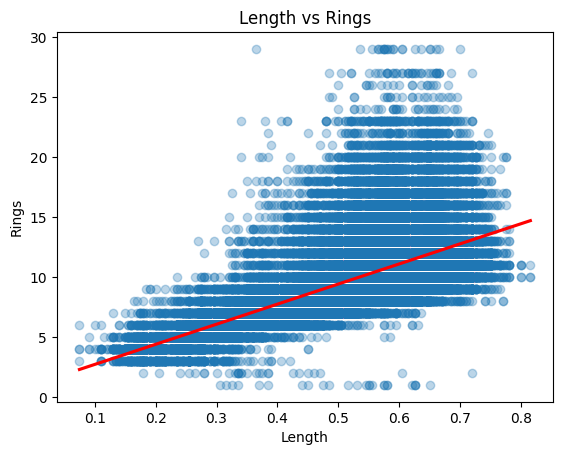

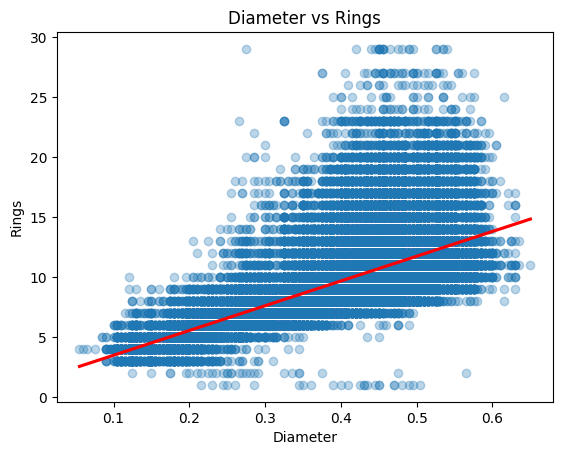

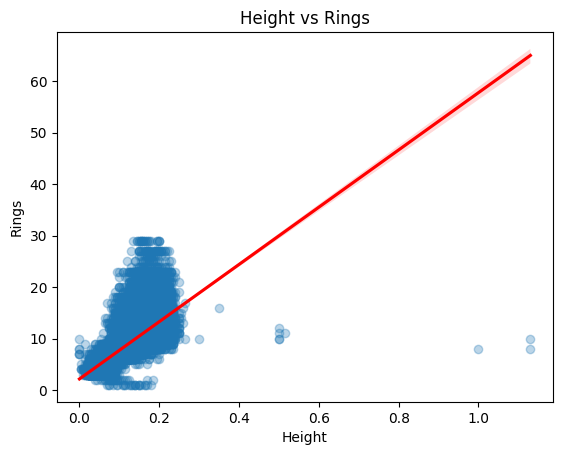

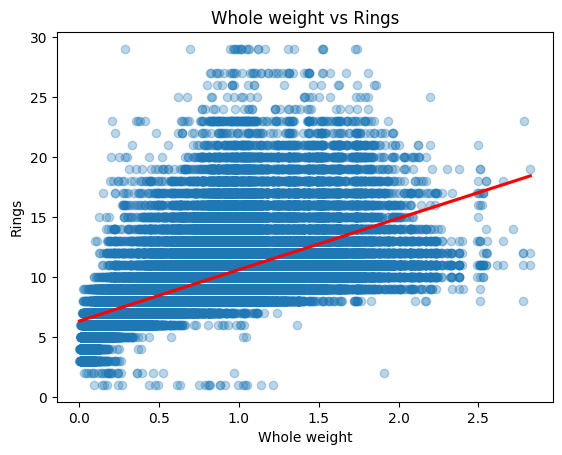

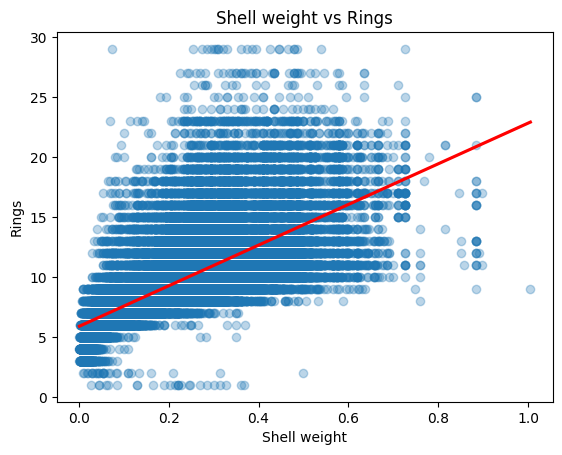

In [9]:
#draw 5 regplots to describe the relationship between the attributes and the target variable
lists = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shell weight']
for x in lists:
    sns.regplot(x=x, y='Rings', data=df_train, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.xlabel(f'{x}')
    plt.ylabel('Rings')
    plt.title(f'{x} vs Rings')
    plt.show()

In [10]:
#correlation matrix
corr = df_train.corr()
corr.Rings.sort_values(ascending=False)

Rings             1.000000
Shell weight      0.694766
Height            0.665772
Diameter          0.636832
Length            0.623786
Whole weight      0.617274
Whole weight.2    0.588954
Whole weight.1    0.515067
id                0.000938
Sex              -0.026308
Name: Rings, dtype: float64

<Axes: >

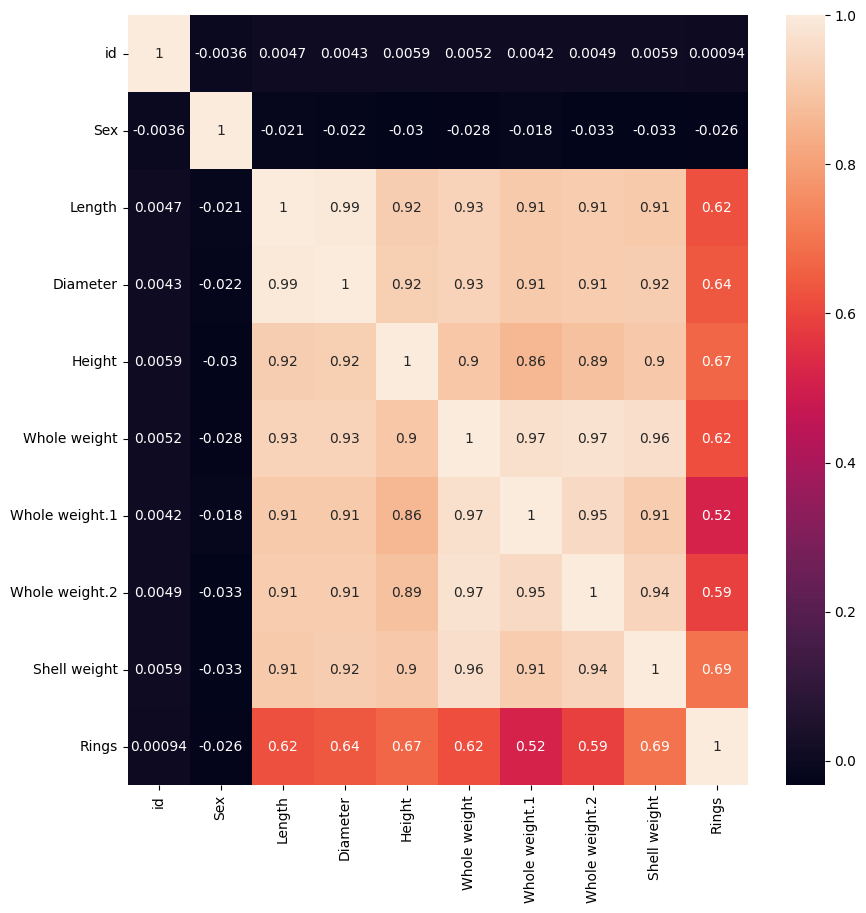

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

In [12]:
#splitting the data
x = df_train.drop(['Rings','id'], axis=1)
y = df_train.Rings
print(x)

       Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0        0   0.550     0.430   0.150        0.7715          0.3285   
1        0   0.630     0.490   0.145        1.1300          0.4580   
2        1   0.160     0.110   0.025        0.0210          0.0055   
3        2   0.595     0.475   0.150        0.9145          0.3755   
4        1   0.555     0.425   0.130        0.7820          0.3695   
...    ...     ...       ...     ...           ...             ...   
90610    2   0.335     0.235   0.075        0.1585          0.0685   
90611    2   0.555     0.425   0.150        0.8790          0.3865   
90612    1   0.435     0.330   0.095        0.3215          0.1510   
90613    1   0.345     0.270   0.075        0.2000          0.0980   
90614    1   0.425     0.325   0.100        0.3455          0.1525   

       Whole weight.2  Shell weight  
0              0.1465        0.2400  
1              0.2765        0.3200  
2              0.0030        0.0050  
3      

In [13]:
print(y)

0        11
1        11
2         6
3        10
4         9
         ..
90610     6
90611     9
90612     6
90613     6
90614     8
Name: Rings, Length: 90615, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((72492, 8), (18123, 8), (72492,), (18123,))

Build the class for two method: Linear Regression and Principal Component Analysis.

## 1. Principal Component Analysis (PCA) - Giảm chiều dữ liệu
<p>PCA là một kỹ thuật phổ biến trong phân tích dữ liệu và học máy.</p>
<p>Mục tiêu chính là giảm số chiều của dữ liệu bằng cách chuyển đổi các biến gốc thành một tập hợp nhỏ hơn các biến gọi là các thành phần chính.Các thành phần chính này được sắp xếp theo độ giảm dần về độ biến động, do đó thành phần đầu tiên giữ lại nhiều thông tin nhất về dữ liệu.</p>
<p>* Các bước để giảm chiều dữ liệu: </p>
<h2>PCA Steps</h2>
    <ol>
        <li>Khởi tạo PCA: Khởi tạo đối tượng PCA với số lượng thành phần chính (n_components) cần giữ lại.</li>
        <li>Fit: Tính toán trung bình của dữ liệu (mean) và trừ trung bình này khỏi từng điểm dữ liệu. Tiếp theo, tính ma trận hiệp phương sai (covariance matrix) của dữ liệu.</li>
        <li>Tính toán giá trị riêng và vector riêng: Sử dụng ma trận hiệp phương sai, tính toán các giá trị riêng (eigenvalues) và các vector riêng (eigenvectors) tương ứng.</li>
        <li>Sắp xếp giá trị riêng và vector riêng: Sắp xếp các giá trị riêng theo thứ tự giảm dần và cập nhật các vector riêng tương ứng theo thứ tự tương ứng.</li>
        <li>Chọn các thành phần chính: Chọn n_components vector riêng đầu tiên (có giá trị riêng lớn nhất) để tạo thành ma trận thành phần chính (components).</li>
        <li>Transform: Trừ trung bình của dữ liệu và áp dụng ma trận thành phần chính đã chọn để chuyển đổi dữ liệu gốc thành dữ liệu mới với số chiều đã giảm.</li>
        <li>Fit_transform: Kết hợp các bước Fit và Transform, trả về dữ liệu đã được giảm chiều sau khi thực hiện PCA.</li>
    </ol>


In [15]:
#reduce the dimension of the data using PCA
class PCA():
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        #calculate the mean of the data
        X = X - self.mean
        #calculate the covariance matrix
        cov = np.cov(X.T)
        #find the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

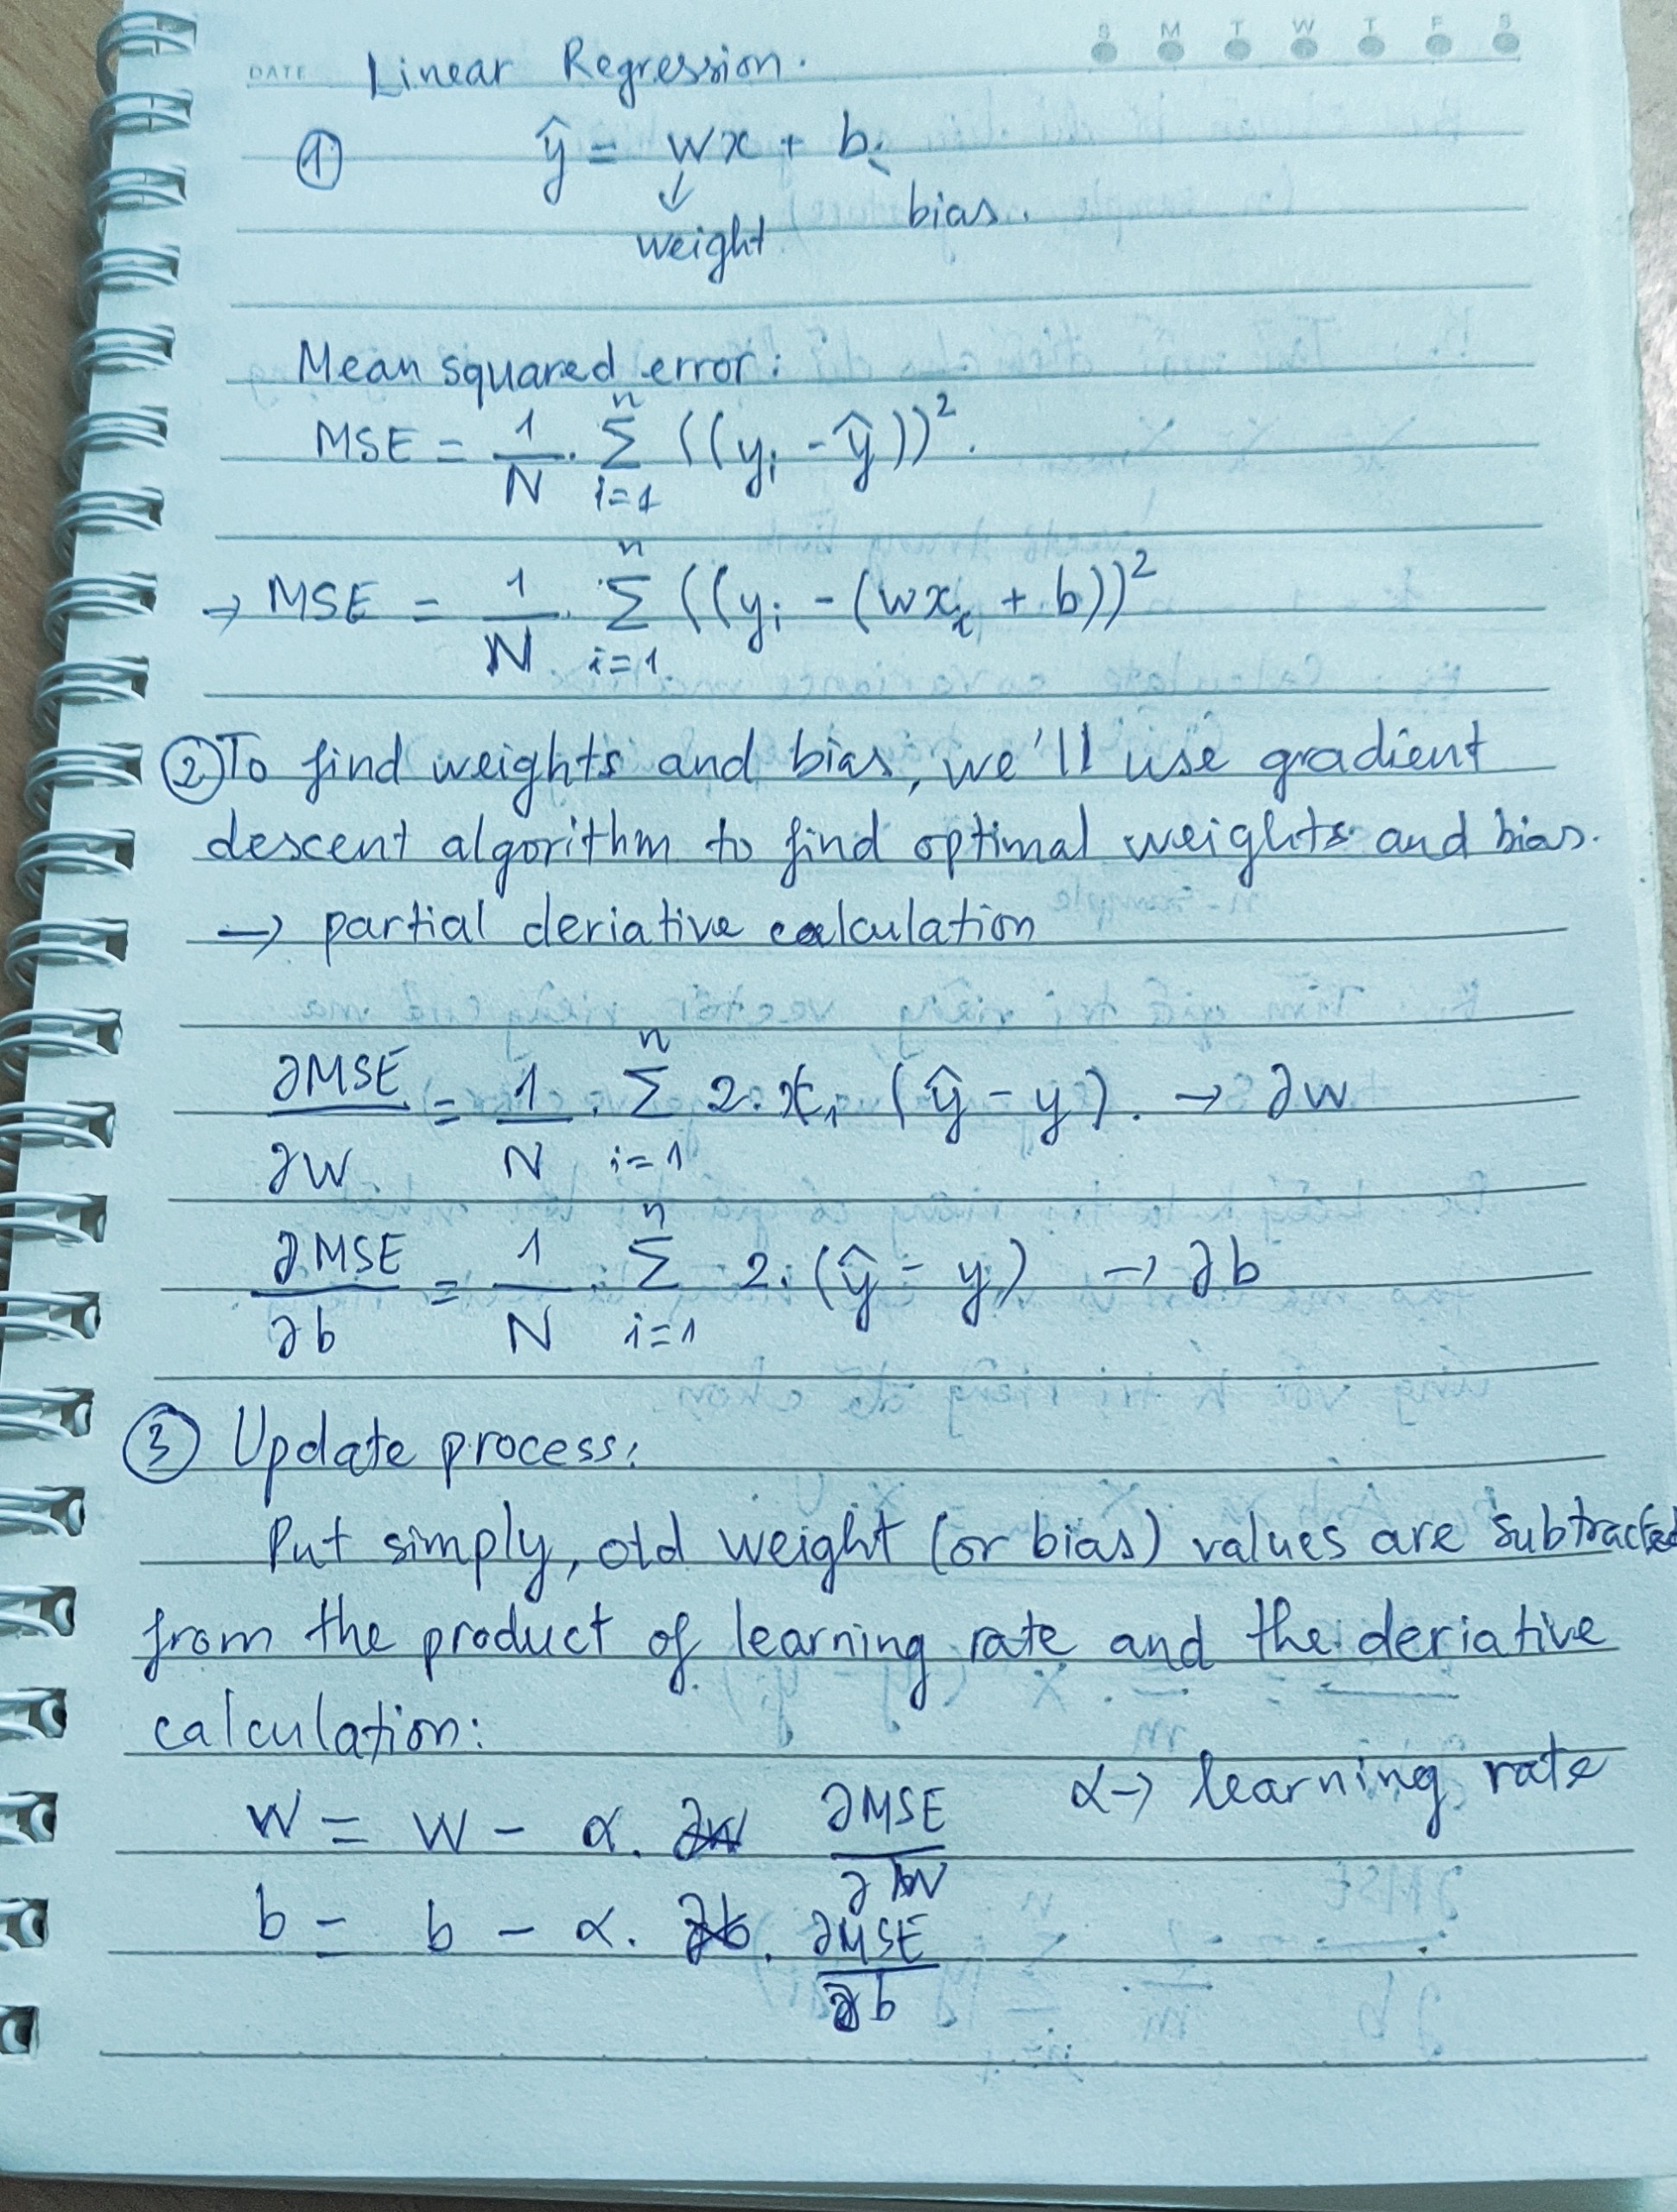


In [16]:
#Build the Linear Regression Model - Multiple Linear Regression
class LinearRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, x, y):
        #no of training examples, no of features
        self.m, self.n = x.shape
        #weight initialization
        self.W = np.zeros(self.n)
        self.b = 0
        self.x = x
        self.y = y
        #gradient descent learning
        for i in range(self.iterations):
            self.update_weights()
        return self
    
    def update_weights(self):
        Y_pred = self.predict(self.x)
        #calculate gradients
        dW = -(2 * (self.x.T).dot(self.y - Y_pred)) / self.m
        db = -2 * np.sum(self.y - Y_pred) / self.m
        #update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return self
    
    def predict(self, x):
        return x.dot(self.W) + self.b

## Execute two class method to run the code.

In [17]:
#Execute the PCA class
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
x_train_pca.shape, x_test_pca.shape

((72492, 2), (18123, 2))

In [18]:
#Execute the Linear Regression class
model = LinearRegression(learning_rate=0.01, iterations=1000)
model.fit(x_train_pca, y_train)

In [19]:
y_pred = model.predict(x_test_pca)
print(y_pred)

[ 8.64215276  7.93710808  9.56501496 ...  8.5001172  11.87672377
 10.73842403]


In [20]:
score = sklearn.metrics.r2_score(y_test, y_pred)
score

0.3734315063841195

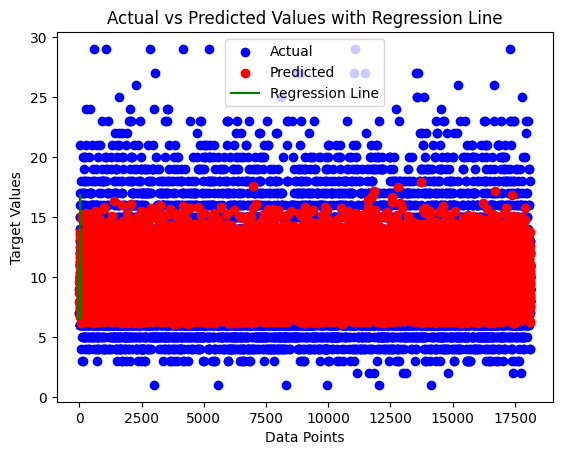

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have trained your model and obtained predictions
predictions = model.predict(x_test_pca)

# Plotting the actual values vs predicted values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted')

# Adding a regression line
regression_line = np.polyfit(y_test, predictions, 1)  # Fit a 1st degree polynomial (linear regression)
plt.plot(y_test, np.polyval(regression_line, y_test), color='green', label='Regression Line')

plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.title('Actual vs Predicted Values with Regression Line')
plt.legend()
plt.show()



In [22]:
print(model.W, model.b)

[ 0.17789051 -3.56913029] 9.697111389076536


In [23]:
from sklearn.metrics import root_mean_squared_log_error
rmsle = root_mean_squared_log_error(y_test, y_pred)
rmsle

0.20776062849959334

In [24]:
df = pd.DataFrame({'Actual': df_train['Rings'].values[:len(y_pred)], 'Predicted': y_pred})
df['Chenh_lech'] = df['Actual'] - df['Predicted']
df.head(20)

,Actual,Predicted,Chenh_lech
0,11,8.642153,2.357847
1,11,7.937108,3.062892
2,6,9.565015,-3.565015
3,10,9.380159,0.619841
4,9,10.874740,-1.874740
5,10,7.870851,2.129149
6,9,13.738644,-4.738644
7,9,13.171127,-4.171127
8,4,8.797939,-4.797939
9,8,11.549295,-3.549295


In [25]:
#use the test.csv to predict and submit on Kaggle
df_test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,2,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,2,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,2,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,1,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [26]:
x_test_pca_test = pca.transform(df_test.drop('id', axis=1))
y_pred_test = model.predict(x_test_pca_test)
print(y_pred_test.shape)

(60411,)


In [27]:
submissions = pd.DataFrame({'id': df_test['id'], 'Rings': y_pred_test})
submissions.to_csv('Hoang-submission.csv', index=False)

## Version 2

In [28]:
#try with Linear Regression model
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(x_train_pca, y_train)

LinearRegression()

In [29]:
y_pred_lr = model_lr.predict(x_test_pca)
print(y_pred_lr)

[ 8.63932083  7.9323988   9.56511391 ...  8.49643356 11.88297815
 10.74164742]


In [30]:
from sklearn.metrics import root_mean_squared_log_error
rmsle = root_mean_squared_log_error(y_test, y_pred_lr)
print(rmsle)

0.2076875641822267


## CatBoosting Regressor

In [31]:
#try using Catboost
from catboost import CatBoostRegressor
model_cb = CatBoostRegressor(iterations=1000, learning_rate=0.01, depth=10, loss_function='RMSE')
model_cb.fit(x_train_pca, y_train, verbose=100)

0:	learn: 3.1555676	total: 154ms	remaining: 2m 33s
100:	learn: 2.5037632	total: 4.28s	remaining: 38.1s
200:	learn: 2.3963157	total: 8.16s	remaining: 32.4s
300:	learn: 2.3771491	total: 12s	remaining: 27.8s
400:	learn: 2.3693447	total: 16.6s	remaining: 24.8s
500:	learn: 2.3632619	total: 20.9s	remaining: 20.8s
600:	learn: 2.3575417	total: 24.8s	remaining: 16.5s
700:	learn: 2.3517959	total: 29.5s	remaining: 12.6s
800:	learn: 2.3466989	total: 34.3s	remaining: 8.52s
900:	learn: 2.3413958	total: 39.3s	remaining: 4.32s
999:	learn: 2.3364011	total: 43.8s	remaining: 0us


In [32]:
y_pred_cb = model_cb.predict(x_test_pca)
print(y_pred_cb)

[ 8.39787466  7.57251023 10.28099981 ...  9.40559702 11.62068528
 11.23649987]


In [33]:
from sklearn.metrics import root_mean_squared_log_error
rmsle = root_mean_squared_log_error(y_test, y_pred_cb)
print(rmsle)

0.18882354678717367


In [34]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if depth >= self.max_depth or len(np.unique(y)) == 1:
            return np.mean(y)
        
        feature_idx, threshold = self._find_best_split(X, y)
        left_mask = X[:, feature_idx] < threshold
        
        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[~left_mask], y[~left_mask], depth + 1)
        
        return {'feature_idx': feature_idx, 'threshold': threshold,
                'left': left_subtree, 'right': right_subtree}

    def _find_best_split(self, X, y):
        best_mse = float('inf')
        best_feature_idx = None
        best_threshold = None
        
        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_mask = X[:, feature_idx] < threshold
                
                if np.sum(left_mask) == 0 or np.sum(~left_mask) == 0:
                    continue
                
                left_y = y[left_mask]
                right_y = y[~left_mask]
                
                mse = np.mean((left_y - np.mean(left_y))**2) + np.mean((right_y - np.mean(right_y))**2)
                
                if mse < best_mse:
                    best_mse = mse
                    best_feature_idx = feature_idx
                    best_threshold = threshold
        
        return best_feature_idx, best_threshold

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _traverse_tree(self, x, node):
        if isinstance(node, dict):
            if x[node['feature_idx']] < node['threshold']:
                return self._traverse_tree(x, node['left'])
            else:
                return self._traverse_tree(x, node['right'])
        else:
            return node

class CatBoostRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        residual = y.copy()
        for _ in range(self.n_estimators):
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X, residual)
            self.trees.append(tree)
            predictions = tree.predict(X)
            residual -= self.learning_rate * predictions

    def predict(self, X):
        predictions = np.zeros(len(X))
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions

In [35]:
x_test_pca_test_cb = pca.transform(df_test.drop('id', axis=1))
y_pred_test_cb = model_cb.predict(x_test_pca_test_cb)
print(y_pred_test_cb.shape)

(60411,)


In [36]:
df_cb_submit = pd.DataFrame({'id': df_test['id'], 'Rings': y_pred_test_cb})
df_cb_submit.to_csv('Hoang-cb-submission.csv', index=False)

## XGBoost Regressor

In [37]:
#try with xgboost
from xgboost import XGBRegressor
model_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=10)
model_xgb.fit(x_train_pca, y_train)
y_pred_xgb = model_xgb.predict(x_test_pca)

In [38]:
print(y_pred_xgb)

[ 8.595248   7.588012  10.1235895 ...  9.618765  11.748303  11.142185 ]


In [39]:
from sklearn.metrics import root_mean_squared_log_error
rmsle = root_mean_squared_log_error(y_test, y_pred_xgb)
print(rmsle)

0.18181229422090803


In [40]:
#try submit with xgboost
x_test_pca_test_xgb = pca.transform(df_test.drop('id', axis=1))
y_pred_test_xgb = model_xgb.predict(x_test_pca_test_xgb)
print(y_pred_test_xgb.shape)
df_xgb_submit = pd.DataFrame({'id': df_test['id'], 'Rings': y_pred_test_xgb})
df_xgb_submit.to_csv('Hoang-xgb-submission.csv', index=False)

(60411,)


## Another Regression Model

In [41]:
#another regression model
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=1000, max_depth=10)
model_rf.fit(x_train_pca, y_train)
y_pred_rf = model_rf.predict(x_test_pca)
print(y_pred_rf)

[ 8.47475759  7.55954766  9.67822601 ...  9.36129288 11.05803843
 11.22862895]


In [42]:
#check rmlse
from sklearn.metrics import root_mean_squared_log_error
rmsle = root_mean_squared_log_error(y_test, y_pred_rf)
print(rmsle)

0.18524520337573627


In [43]:
actual_values = df_train['Rings'].values[:len(y_pred_rf)]
predicted_values = y_pred_rf
df_rf = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})
df_rf['Chenh_lech'] = df_rf['Actual'] - df_rf['Predicted']
df_rf.head(20)

,Actual,Predicted,Chenh_lech
0,11,8.474758,2.525242
1,11,7.559548,3.440452
2,6,9.678226,-3.678226
3,10,10.359621,-0.359621
4,9,11.415944,-2.415944
5,10,7.550744,2.449256
6,9,12.637755,-3.637755
7,9,12.555876,-3.555876
8,4,8.466572,-4.466572
9,8,10.977218,-2.977218


In [44]:
#build the class XgBoost Regressor
class DecisionTree:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if depth >= self.max_depth or len(set(y)) == 1:
            return np.mean(y)
        else:
            best_feature, best_value = self._find_best_split(X, y)
            left_indices = X[:, best_feature] < best_value
            right_indices = ~left_indices
            left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
            right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)
            return (best_feature, best_value, left_tree, right_tree)

    def _find_best_split(self, X, y):
        best_feature = None
        best_value = None
        best_loss = float('inf')
        for feature in range(X.shape[1]):
            sorted_indices = np.argsort(X[:, feature])
            for i in range(1, len(X)):
                if X[sorted_indices[i], feature] != X[sorted_indices[i - 1], feature]:
                    value = (X[sorted_indices[i], feature] + X[sorted_indices[i - 1], feature]) / 2
                    left_indices = sorted_indices[:i]
                    right_indices = sorted_indices[i:]
                    loss = self._calculate_loss(y[left_indices], y[right_indices])
                    if loss < best_loss:
                        best_loss = loss
                        best_feature = feature
                        best_value = value
        return best_feature, best_value

    def _calculate_loss(self, left_y, right_y):
        left_mean = np.mean(left_y)
        right_mean = np.mean(right_y)
        return np.sum((left_y - left_mean) ** 2) + np.sum((right_y - right_mean) ** 2)

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree) for x in X])

    def _predict_tree(self, x, tree):
        if isinstance(tree, float):
            return tree
        else:
            feature, value, left_tree, right_tree = tree
            if x[feature] < value:
                return self._predict_tree(x, left_tree)
            else:
                return self._predict_tree(x, right_tree)


class XGBoostRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth

    def fit(self, X, y):
        self.estimators = []
        y_pred = np.zeros_like(y)
        for _ in range(self.n_estimators):
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X, y - y_pred)
            self.estimators.append(tree)
            y_pred += self.learning_rate * tree.predict(X)

    def predict(self, X):
        y_pred = np.zeros(len(X))
        for tree in self.estimators:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

## All Model Evaluation

In [45]:
#All model evaluation
#Linear Regression
print('Linear Regression')
print('RMSLE:', root_mean_squared_log_error(y_test, y_pred))
print('R2 Score:', sklearn.metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))
print()

Linear Regression
RMSLE: 0.20776062849959334
R2 Score: 0.3734315063841195
Mean Absolute Error: 1.773412574227371
Mean Squared Error: 6.436334600307609
Root Mean Squared Error: 2.536993220390549



In [46]:
#CatBoost
print('CatBoost')
print('RMSLE:', root_mean_squared_log_error(y_test, y_pred_cb))
print('R2 Score:', sklearn.metrics.r2_score(y_test, y_pred_cb))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(y_test, y_pred_cb))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(y_test, y_pred_cb))
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred_cb)))
print()

CatBoost
RMSLE: 0.18882354678717367
R2 Score: 0.44787319597503117
Mean Absolute Error: 1.6588351329039632
Mean Squared Error: 5.671643066498895
Root Mean Squared Error: 2.381521166502388



In [47]:
#XGBoost
print('XGBoost')
print('RMSLE:', root_mean_squared_log_error(y_test, y_pred_xgb))
print('R2 Score:', sklearn.metrics.r2_score(y_test, y_pred_xgb))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(y_test, y_pred_xgb))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(y_test, y_pred_xgb))
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred_xgb)))
print()

XGBoost
RMSLE: 0.18181229422090803
R2 Score: 0.4930124894251693
Mean Absolute Error: 1.5738628354483288
Mean Squared Error: 5.207956176355526
Root Mean Squared Error: 2.2820946904884396



In [50]:
#table evaluation:
data = {'Model': ['Linear Regression', 'CatBoost', 'XGBoost', 'Random Forest'],
        'RMSLE': [root_mean_squared_log_error(y_test, y_pred), root_mean_squared_log_error(y_test, y_pred_cb), root_mean_squared_log_error(y_test, y_pred_xgb), root_mean_squared_log_error(y_test, y_pred_rf)],
        'R2 Score': [sklearn.metrics.r2_score(y_test, y_pred), sklearn.metrics.r2_score(y_test, y_pred_cb), sklearn.metrics.r2_score(y_test, y_pred_xgb), sklearn.metrics.r2_score(y_test, y_pred_rf)],
        'Mean Absolute Error': [sklearn.metrics.mean_absolute_error(y_test, y_pred), sklearn.metrics.mean_absolute_error(y_test, y_pred_cb), sklearn.metrics.mean_absolute_error(y_test, y_pred_xgb), sklearn.metrics.mean_absolute_error(y_test, y_pred_rf)],
        'Mean Squared Error': [sklearn.metrics.mean_squared_error(y_test, y_pred), sklearn.metrics.mean_squared_error(y_test, y_pred_cb), sklearn.metrics.mean_squared_error(y_test, y_pred_xgb), sklearn.metrics.mean_squared_error(y_test, y_pred_rf)],
        'Root Mean Squared Error': [np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)), np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred_cb)), np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred_xgb)), np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred_rf))]}
df_eval = pd.DataFrame(data)
df_eval

,Model,RMSLE,R2 Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,0.207761,0.373432,1.773413,6.436335,2.536993
1,CatBoost,0.188824,0.447873,1.658835,5.671643,2.381521
2,XGBoost,0.181812,0.493012,1.573863,5.207956,2.282095
3,Random Forest,0.185245,0.468937,1.620264,5.455263,2.335651
